                                                REAL STATE - KATIA SACO 

In [1]:
# Requerimientos
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
##Importar los datos del PDF
df =pd.read_csv(r'C:\Users\katia\.vscode\examplecode\MODULO_2\2.EDA\RealEstateAU_1000_Samples.csv')
df

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,0411724000,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,0418885966,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1351983,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,NaN,9.17ha,9.17ha,Under offer,United Realty NT - Parap,...,NT,834,08 8981 2666,NaN,NaN,feature,4.0,3.0,6.0,2022-05-27 15:54:05
996,996,1351984,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,203m²,600m²,600m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,2022-05-27 15:54:05
997,997,1351985,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,209.6m²,800m²,800m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,2022-05-27 15:54:05
998,998,1351986,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,180m²,450m²,450m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,810,08 89834326,NaN,NaN,standard,4.0,2.0,3.0,2022-05-27 15:54:05


In [3]:
df.isnull().sum().sum()

4399

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

#scamos los porcentajes de los datos, mas de 30 se eliminan.


longitude          100.0
latitude           100.0
building_size       72.0
open_date           69.8
land_size           46.7
preferred_size      39.1
parking_count        3.3
bathroom_count       3.3
bedroom_count        3.3
address              1.2
address_1            1.2
index                0.0
state                0.0
product_depth        0.0
phone                0.0
zip_code             0.0
location_name        0.0
city                 0.0
TID                  0.0
location_type        0.0
location_number      0.0
price                0.0
listing_agency       0.0
property_type        0.0
category_name        0.0
breadcrumb           0.0
RunDate              0.0
dtype: float64

In [5]:
#procedemos a eliminar columnas;
df.drop(['longitude'],axis=1,inplace=True);
df.drop(['latitude'],axis=1,inplace=True);
df.drop(['building_size'],axis=1,inplace=True);
df.drop(['open_date'],axis=1,inplace=True);
df.drop(['land_size'],axis=1,inplace=True);
df.drop(['preferred_size'],axis=1,inplace=True);
df.drop(['bathroom_count'],axis=1,inplace=True);
df.drop(['bedroom_count'],axis=1,inplace=True);
df.drop(['location_name'],axis=1,inplace=True);
df.drop(['parking_count'],axis=1,inplace=True);
df.drop(['address'],axis=1,inplace=True);
df.drop(['address_1'],axis=1,inplace=True);

In [6]:
df.isnull().sum()

#todos los datos estan limpios!

index              0
TID                0
breadcrumb         0
category_name      0
property_type      0
listing_agency     0
price              0
location_number    0
location_type      0
city               0
state              0
zip_code           0
phone              0
product_depth      0
RunDate            0
dtype: int64

In [7]:
def reparar_outliers(dataset):
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
    dataset_sin_outliers = dataset.copy()
    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            moda = dataset[col].mode()[0]
            dataset_sin_outliers.loc[outliers[col], col] = moda
        else:
            media = dataset[col].mean()
            dataset_sin_outliers.loc[outliers[col], col] = media
    return dataset_sin_outliers

In [8]:
reparar_outliers(df)

C:\Users\katia\AppData\Local\Temp\ipykernel_4344\3142063826.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
C:\Users\katia\AppData\Local\Temp\ipykernel_4344\3142063826.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
C:\Users\katia\AppData\Local\Temp\ipykernel_4344\3142063826.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))


,index,TID,breadcrumb,category_name,property_type,listing_agency,price,location_number,location_type,city,state,zip_code,phone,product_depth,RunDate
0,0.0,1350988.0,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,Professionals - DARWIN CITY,"$435,000",139468611.0,Buy,Darwin City,NT,800.0,08 8941 8289,premiere,2022-05-27 15:54:05
1,1.0,1350989.0,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755.0,Buy,Darwin City,NT,800.0,0411724000,premiere,2022-05-27 15:54:05
2,2.0,1350990.0,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,Habitat Real Estate - THE GARDENS,"$310,000",139462495.0,Buy,Darwin City,NT,800.0,08 8981 0080,premiere,2022-05-27 15:54:05
3,3.0,1350991.0,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,Ray White - NIGHTCLIFF,"$259,000",139451679.0,Buy,Darwin City,NT,800.0,08 8982 2403,premiere,2022-05-27 15:54:05
4,4.0,1350992.0,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,Carol Need Real Estate - Fannie Bay,"$439,000",139433803.0,Buy,Darwin City,NT,800.0,0418885966,premiere,2022-05-27 15:54:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995.0,1351983.0,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,United Realty NT - Parap,2 Residence,138346247.0,Buy,Virginia,NT,834.0,08 8981 2666,feature,2022-05-27 15:54:05
996,996.0,1351984.0,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,Kassiou Constructions - HOWARD SPRINGS,"$601,000",138333062.0,Buy,Humpty Doo,NT,836.0,08 89834326,standard,2022-05-27 15:54:05
997,997.0,1351985.0,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,Kassiou Constructions - HOWARD SPRINGS,"$655,000",138333058.0,Buy,Humpty Doo,NT,836.0,08 89834326,standard,2022-05-27 15:54:05
998,998.0,1351986.0,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,Kassiou Constructions - HOWARD SPRINGS,"$675,000",138333050.0,Buy,Lee Point,NT,810.0,08 89834326,standard,2022-05-27 15:54:05


In [9]:
dataset_sin_outliers = pd.DataFrame(reparar_outliers(df))

C:\Users\katia\AppData\Local\Temp\ipykernel_4344\3142063826.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
C:\Users\katia\AppData\Local\Temp\ipykernel_4344\3142063826.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
C:\Users\katia\AppData\Local\Temp\ipykernel_4344\3142063826.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))


Procedamos ahora a la implementación de los dos pequeños métodos de nuestro algoritmo:

<AxesSubplot: >

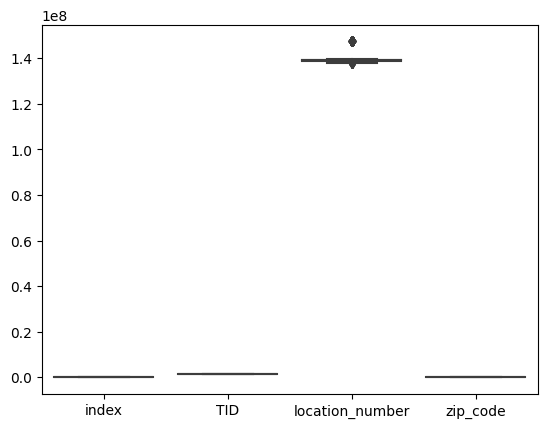

In [10]:
sns.boxplot(data = dataset_sin_outliers)

In [11]:
#YA TENEMOS LA TABLA LIMPIA, YA PODEMOS EMPEZAR A SACAR INFORMACIÓN
"""The dataset contains information on 1000 properties in Australia, including location, size, price, and other details
breadcrumb: A breadcrumb is a text trail that shows the user's location within a website. (String)
category_name: The name of the category that the listing belongs to. (String)
property_type: The type of property being listed. (String)
listing_agency: The agency that is listing the property. (String)
price: The listing price of the property. (Numeric)
location_number: The number that corresponds to the property's location. (Numeric)
location_type: The type of location that the property is in. (String)
city: The city that the property is located in. (String)
state: The state that the property is located in. (String)
zip_code: The zip code that the property is located in. (String)
phone: The listing agent's phone number. (String)
product_depth: The depth of the product. (Numeric)
RunDate: The date that the listing was last updated. (Date)"""


"The dataset contains information on 1000 properties in Australia, including location, size, price, and other details\nbreadcrumb: A breadcrumb is a text trail that shows the user's location within a website. (String)\ncategory_name: The name of the category that the listing belongs to. (String)\nproperty_type: The type of property being listed. (String)\nlisting_agency: The agency that is listing the property. (String)\nprice: The listing price of the property. (Numeric)\nlocation_number: The number that corresponds to the property's location. (Numeric)\nlocation_type: The type of location that the property is in. (String)\ncity: The city that the property is located in. (String)\nstate: The state that the property is located in. (String)\nzip_code: The zip code that the property is located in. (String)\nphone: The listing agent's phone number. (String)\nproduct_depth: The depth of the product. (Numeric)\nRunDate: The date that the listing was last updated. (Date)"

In [12]:
df[['category_name']].value_counts().head()
#cambiamos por 0 y 1 ya que solo tenemos dos tipos.

category_name                                          
Real Estate & Property for sale in DARWIN, NT 0801         816
Real Estate & Property for sale in DARWIN CITY, NT 0800    184
dtype: int64

In [13]:
df["category_name"] = df["category_name"].map({"Real Estate & Property for sale in DARWIN, NT 0801": 0, "Real Estate & Property for sale in DARWIN CITY, NT 0800": 1})

In [14]:
df[['breadcrumb']].value_counts().head()

#tambien limpiamos esta columna

breadcrumb        
Buy>NT>DARWIN         816
Buy>NT>DARWIN CITY    184
dtype: int64

In [15]:
#sabemos que nt =0 y city nt = 1

In [16]:
df["breadcrumb"] = df["breadcrumb"].map({"Buy>NT>DARWIN ": 0, "Buy>NT>DARWIN CITY": 1})

In [17]:
df[['property_type']].value_counts().head()
#vamos a dejar esos valores por las propiedades.

property_type   
House               441
Unit                230
Apartment           212
Townhouse            38
Residential Land     33
dtype: int64

In [18]:
df[['listing_agency']].value_counts().head()
#el nombre de las agencias son estas

listing_agency                                 
Real Estate Central - DARWIN CITY                  113
Elders Real Estate - Darwin                         62
Elders Real Estate - Palmerston                     53
Raine & Horne - Darwin                              48
First National Real Estate O'Donoghues - Darwin     41
dtype: int64

In [19]:
df[['location_number']].value_counts().head()

#localizacion de las casas por numero 

location_number
600031494          5
600000995          5
600031186          3
139201043          2
139373983          2
dtype: int64

In [20]:
df[['location_type']].value_counts().head()
#la localización tipo, todo son compras para que se entienda el buy.

location_type
Buy              1000
dtype: int64

In [21]:
df[['city']].value_counts().head()
#tenemos todas estas localizaciones.

city       
Darwin City    285
Stuart Park     39
Rosebery        37
Bakewell        31
Durack          30
dtype: int64

In [22]:
df[['zip_code']].value_counts().head()
#todos los codigos que tenemos 

zip_code
800         285
832         160
810         153
820         133
830         130
dtype: int64

In [23]:
df[['product_depth']].value_counts().head()

product_depth
premiere         659
feature          172
standard         162
midtier            7
dtype: int64

In [24]:
df[['RunDate']].value_counts().head()
#vamos a cambiar la fecha a la correcta como datetime

RunDate            
2022-05-27 15:54:05    1000
dtype: int64

In [25]:
df['RunDate'] = pd.to_datetime(df['RunDate'])

In [26]:
#Quitamos todo el texto de la columna precio.
df["price"] = df["price"].str.replace("$", "")
df["price"] = df["price"].str.replace(",", ".")
df["price"] = df["price"].str.extract('(\d+\.\d+)').astype(float).round(2)

#Como me ha convertido arriba los valores en nulos, aplico la media con fillna
df["price"].fillna(df["price"].mean(), inplace=True)

C:\Users\katia\AppData\Local\Temp\ipykernel_4344\585641923.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"] = df["price"].str.replace("$", "")


In [27]:
df[['price']].value_counts().head()


price     
467.699673    236
399.000000     15
450.000000     14
500.000000     13
550.000000     12
dtype: int64

In [28]:
df.dtypes

index                       int64
TID                         int64
breadcrumb                float64
category_name               int64
property_type              object
listing_agency             object
price                     float64
location_number             int64
location_type              object
city                       object
state                      object
zip_code                    int64
phone                      object
product_depth              object
RunDate            datetime64[ns]
dtype: object

In [29]:
"""def remove_letters(column):
    return ''.join(filter(str.isdigit, column))"""
    #nos sirve para eliminar todas las cosas que no sean numero de una columna. 

"def remove_letters(column):\n    return ''.join(filter(str.isdigit, column))"

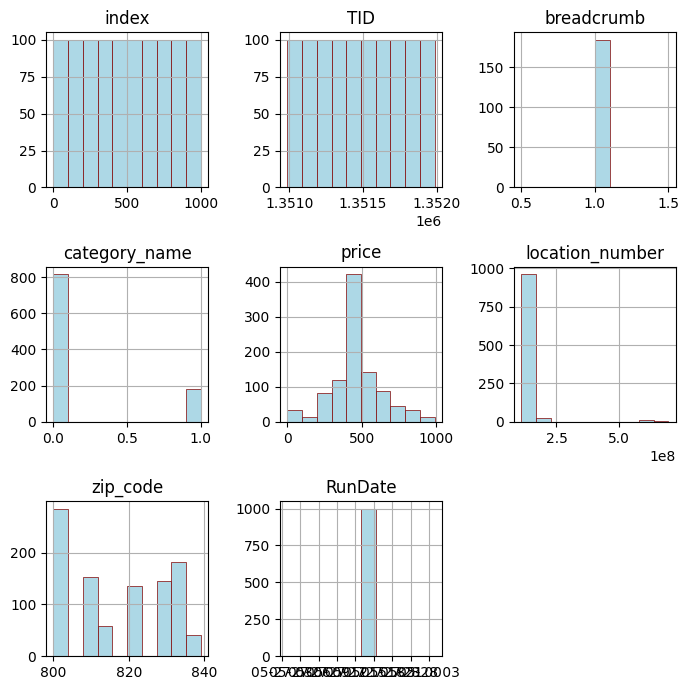

In [30]:
#Vamos a sacar un analisis global de todo lo que tenemos 
df.hist(figsize=(7,7) , color= "lightblue", edgecolor='maroon' , linewidth= 0.5) , plt.tight_layout()
plt.show()

A PARTIR DE AHORA , HACER TODOS LOS GRAFICOS Y SACAR DATOS !!!

In [34]:
import pycaret
#PyCaret es una de las librerías de Python más populares para el desarrollo de modelos de Machine Learning. 
# Con Pycaret puedes hacer muchas cosas, cómo: Aplicar imputación de valores perdidos, escalado, feature engineering o 
# feature selectionde una forma muy sencilla, tan solo con tan solo indicar unos parámetros.

In [35]:
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [36]:
from pycaret.classification import *
s = setup(data, target = 'Purchase')

,Description,Value
0,Session id,7326
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Ordinal features,1
9,Numeric features,17


In [37]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8278,0.0000,0.7571,0.8003,0.7739,0.6356,0.6406,0.0260
lr,Logistic Regression,0.8265,0.8972,0.7366,0.8092,0.7679,0.6302,0.6352,0.8360
lda,Linear Discriminant Analysis,0.8265,0.8991,0.7641,0.7930,0.7743,0.6340,0.6387,0.0290
gbc,Gradient Boosting Classifier,0.8185,0.8940,0.7367,0.7886,0.7576,0.6135,0.6182,0.0560
ada,Ada Boost Classifier,0.8104,0.8898,0.7157,0.7870,0.7442,0.5950,0.6014,0.0470
rf,Random Forest Classifier,0.7864,0.8718,0.6989,0.7497,0.7191,0.5479,0.5529,0.1010
lightgbm,Light Gradient Boosting Machine,0.7811,0.8679,0.7093,0.7307,0.7166,0.5390,0.5423,0.0460
knn,K Neighbors Classifier,0.7611,0.8000,0.6414,0.7205,0.6738,0.4878,0.4936,0.3030
et,Extra Trees Classifier,0.7597,0.8385,0.6786,0.7092,0.6881,0.4939,0.4995,0.0870
nb,Naive Bayes,0.7583,0.8246,0.7507,0.6711,0.7072,0.5029,0.5069,0.0370


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [40]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [41]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

In [42]:
exp1.setup(data, target = 'Purchase')

,Description,Value
0,Session id,7261
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Ordinal features,1
9,Numeric features,17


In [43]:
dir(exp1)

['USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_custom_pipeline',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_attributes_to_not_save',
 '_available_plots',
 '_balance',
 '_bin_numerical_features',
 '_calculate_metrics',
 '_check_environment',
 '_check_setup_ran',
 '_choose_better',
 '_clean_column_names',
 '_convert_log_experiment',
 '_create_app_predict_kwargs',
 '_create_model',
 '_create_model_with_cv',
 '_create_model_without_cv',
 '_date_feature_engineering',
 '_display_container',
 '_encode_target_column',
 '_encoding',
 '_

In [44]:
exp1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8224,0.8985,0.7563,0.7864,0.7662,0.6236,0.6288,0.0290
ridge,Ridge Classifier,0.8185,0.0000,0.7495,0.7818,0.7611,0.6151,0.6196,0.0230
gbc,Gradient Boosting Classifier,0.8145,0.8948,0.7461,0.7735,0.7565,0.6069,0.6102,0.0590
ada,Ada Boost Classifier,0.8132,0.8774,0.7291,0.7792,0.7516,0.6022,0.6046,0.0510
lr,Logistic Regression,0.8118,0.8960,0.7222,0.7811,0.7468,0.5978,0.6023,0.8780
rf,Random Forest Classifier,0.8078,0.8832,0.7329,0.7687,0.7488,0.5933,0.5953,0.0930
lightgbm,Light Gradient Boosting Machine,0.7931,0.8879,0.7226,0.7441,0.7307,0.5630,0.5656,0.0460
et,Extra Trees Classifier,0.7771,0.8628,0.6949,0.7291,0.7069,0.5276,0.5323,0.0840
knn,K Neighbors Classifier,0.7543,0.8131,0.6236,0.7195,0.6637,0.4721,0.4786,0.3680
nb,Naive Bayes,0.7530,0.8346,0.7563,0.6609,0.7035,0.4934,0.4993,0.0290


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [47]:
import matplotlib as plt